<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP3_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**consigna**: Implementar un aplicativo que ejecute las operaciones vistas en este tema.
Se muestra la interfaz gráfica de un ejemplo en particular.

**Bloque 1** - carga de imágenes

In [ ]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021


fatal: destination path 'cursoPDI2021' already exists and is not an empty directory.


si luego de sumar las imágenes se hace un clip al rango 0-255, tampoco cambia el resultado respecto de la suma libre anterior

**Bloque 2** interfaz interactiva


leyendo archivo: ./cursoPDI2021/imagenes/milo4r.png (480, 853, 3)
leyendo archivo: ./cursoPDI2021/imagenes/rio_uruguay_4.png (480, 853, 3)


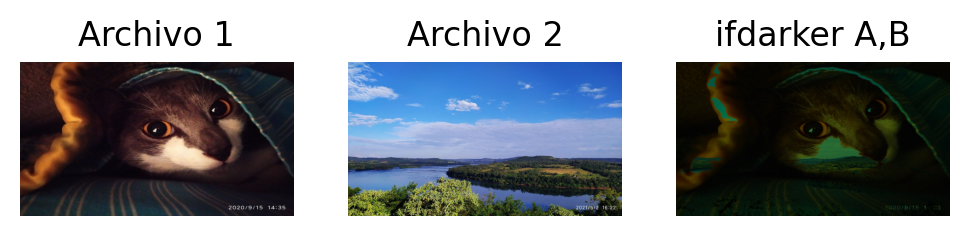

**Análisis del resultado**
En este caso las imágenes se transforman al espacio YIQ, pero la   suma de sus componentes se realiza de forma tal en que en cada pixel sólo quedan   los valores de cada compontente YIQ del pixel de cada imagen que tiene menor luminancia


In [46]:
#Procurar buscar imágenes que tengan el mismo tamaño
archi1 = "milo4r" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
archi2 = "rio_uruguay_4" #@param [ "rio_uruguay_3", "rio_uruguay_4", "michar", "micha2r", "milo2r", "milo3r", "milo4r", "milo5r", "milo6r", "Samr","Sam2r","sam3r"]
operacion = "if-darker" #@param [ "suma RGB","suma RGB recortada","suma RGB promediada","resta RGB","resta RGB recortada","resta RGB promediada","suma YIQ","suma YIQ promediada","if-lighter", "if-darker"]
import matplotlib.pyplot as plt
import imageio as img
import numpy as np

#cargo imágenes de prueba
# Import an image from directory:
path="./cursoPDI2021/imagenes/"
#archi="patron_RGBCMYWK"
#archi1="río_uruguay_4"
#archi2="milo6r"
#archi="río_uruguay_3"
#archi="río_uruguay_2"
ext="png"

#formato actual
#input_image= mpimg.imread(f"{archi}.{ext}")  #lee con matplotlib
Img1=img.imread(f"{path}{archi1}.{ext}")      #lee con imageio
Img2=img.imread(f"{path}{archi2}.{ext}")      #lee con imageio
input_tam=Img1.shape
print("leyendo archivo:", f"{path}{archi1}.{ext}", input_tam)
print("leyendo archivo:", f"{path}{archi2}.{ext}", Img2.shape)

#plt.subplot(1,2,1)
#plt.imshow(Img1)
#plt.subplot(1,2,2)
#plt.imshow(Img2)
#plt.show()

def Mostrar(Img1,Txt1,Img2,Txt2,Img3,Txt3):
  plt.figure (dpi=200)
  ax1=plt.subplot(1,3,1)
  plt.imshow(Img1)
  plt.title(Txt1)
  #plt.setp(ax1.get_yticklabels(), fontsize=6)
  #plt.setp(ax1.get_xticklabels(), fontsize=6)
  plt.axis('off')

  ax2=plt.subplot(1,3,2, sharey=ax1)
  plt.imshow(Img2)
  plt.title(Txt2)
  #plt.setp(ax2.get_yticklabels(), visible=False)
  #plt.setp(ax2.get_xticklabels(), fontsize=6)
  plt.axis('off')

  ax3= plt.subplot(1,3,3, sharey=ax1)
  plt.imshow(Img3)
  plt.title(Txt3)
  #plt.setp(ax3.get_yticklabels(), visible=False)
  #plt.setp(ax3.get_xticklabels(), fontsize=6)
  plt.axis('off')
  plt.show()

#normalizar imagenes
def normImg(Img1):
  return 1/255*Img1

def sumaRGB( Img1,Img2):
  #calculo suma RGB de las imágenes
  #resultado=img1+img2
  Resultado=Img1.astype(np.float)+ Img2.astype(np.float)
  return Resultado

def sumaRGBrec (Img1,Img2):
  #calculo suma RGB de las imágenes
  Resultado=Img1.astype(np.float) + Img2.astype(np.float)
  Resultado=np.clip(Resultado,0,255.)
  return Resultado

def restaRGB( Img1,Img2):
  #calculo resta RGB de las imágenes
  #resultado=img1-img2
  Resultado=Img1.astype(np.float)- Img2.astype(np.float)
  return Resultado

def restaRGBrec(Img1, Img2):
  #calculo suma RGB de las imágenes
  #resultado=img1+img2
  Resultado=Img1.astype(np.float)- Img2.astype(np.float)
  Resultado=np.clip(Resultado,0,255)#recorto los valores negativos
  return Resultado

def sumaRGBprom(Img1,Img2):
  #calculo suma RGB de las imágenes previamente promediadas
  Resultado=Img1.astype(np.float)/2+Img2.astype(np.float)/2
  Resultado=np.clip(Resultado,0,255)
  return Resultado

def restaRGBprom(Img1,Img2):
  #calculo suma RGB de las imágenes previamente promediadas
  Resultado=Img1.astype(np.float)/2 - Img2.astype(np.float)/2
  Resultado=np.clip(Resultado,0,255)
  return Resultado

#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image

def YIQ_TO_RGB(YIQImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  RGB_image=np.zeros(YIQImage.shape, dtype=float)
  RGB_image=np.dot(YIQImage,RGB2YIQ.T.copy())
  return RGB_image



def sumaYIQ(Img1, Img2):
  input_tam=Img1.shape
  #Resultado=np.zeros(input_tam, dtype=float)
  yiq3=np.zeros(input_tam, dtype=float)

  #normalizo la imagen de entrada
  nImg1=1/255*Img1.astype('float') #la imagen queda en tipo float
  nImg2=1/255*Img2.astype('float') #la imagen queda en tipo float

  yiq1=RGB_TO_YIQ (nImg1)
  yiq2=RGB_TO_YIQ (nImg2)

  #sumo las imágenes con cada canal por separado
  #se interpolan los canales IQ mediante:
  #IC= (YA * IA + YB * IB) / (YA + YB)
  #QC= (YA * QA + YB * QB) / (YA + YB)
  #yiq3[:,:,0]=yiq1[:,:,0]/2+yiq2[:,:,0]/2 #suma el canal Y promediando
  #yiq3[:,:,1]=yiq1[:,:,1]+yiq2[:,:,1] 
  #yiq3[:,:,2]=yiq1[:,:,2]+yiq2[:,:,2] 
  yiq3[:,:,0]=yiq1[:,:,0]+yiq2[:,:,0] #luego hay que recortar
  yiq3[:,:,1]=(yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]* yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
  yiq3[:,:,2]=(yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]* yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])


  #recorto los valores extremos
  yiq3[:,:,0]=np.clip(yiq3[:,:,0],0,1) #recorto los valores Y
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5957,.5957) #recorto los valores I
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5226,.5226) #recorto los valores Q

  #falta YIQ-> RGB
  Img3= YIQ_TO_RGB(yiq3)

  #desnormalizar
  #desnormalizar RGB
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  #mostrar resultados
  return Img3



def sumaYIQprom(Img1, Img2):
  input_tam=Img1.shape
  #Resultado=np.zeros(input_tam, dtype=float)
  yiq3=np.zeros(input_tam, dtype=float)

  #normalizo la imagen de entrada
  nImg1=1/255*Img1.astype('float') #la imagen queda en tipo float
  nImg2=1/255*Img2.astype('float') #la imagen queda en tipo float

  yiq1=RGB_TO_YIQ (nImg1)
  yiq2=RGB_TO_YIQ (nImg2)

  #sumo las imágenes con cada canal por separado
  #se interpolan los canales IQ mediante
  #IC= (YA * IA + YB * IB) / (YA + YB)
  #QC= (YA * QA + YB * QB) / (YA + YB)
  
  #yiq3[:,:,0]=yiq1[:,:,0]/2+yiq2[:,:,0]/2 #suma el canal Y promediando
  #yiq3[:,:,0]=0.5*yiq1[:,:,0]+0.5*yiq2[:,:,0] #suma el canal Y promediando
  #yiq3[:,:,1]=yiq1[:,:,1]+yiq2[:,:,1] 
  #yiq3[:,:,2]=yiq1[:,:,2]+yiq2[:,:,2] 
  yiq3[:,:,0]=0.5*yiq1[:,:,0]+0.5*yiq2[:,:,0] #suma el canal Y promediando
  yiq3[:,:,1]=(yiq1[:,:,0]*yiq1[:,:,1]+yiq2[:,:,0]* yiq2[:,:,1])/(yiq1[:,:,0]+yiq2[:,:,0])
  yiq3[:,:,2]=(yiq1[:,:,0]*yiq1[:,:,2]+yiq2[:,:,0]* yiq2[:,:,2])/(yiq1[:,:,0]+yiq2[:,:,0])


  #recorto los valores extremos
  yiq3[:,:,0]=np.clip(yiq3[:,:,0],0,1) #recorto los valores Y
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5957,.5957) #recorto los valores I
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5226,.5226) #recorto los valores Q

  #falta YIQ-> RGB
  Img3= YIQ_TO_RGB(yiq3)

  #desnormalizar
  #desnormalizar RGB
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  #mostrar resultados
  return Img3


def iflighterYIQ(Img1,Img2):  
  input_tam=Img1.shape
  Resultado=np.zeros(input_tam, dtype=float)
  yiq3=np.zeros(input_tam, dtype=float)

  #normalizo la imagen de entrada
  nImg1=1/255*Img1 #la imagen queda en tipo float
  nImg2=1/255*Img2 #la imagen queda en tipo float

 #transformo las imágenes normalizadas al espacio de coordenadas YIQ
  yiq1=RGB_TO_YIQ (nImg1)
  yiq2=RGB_TO_YIQ (nImg2)


  #acá va la lógica del if-lighter
  #escribiendo mal, la idea es hacer algo así
  #yiq3[:,:,0] = if (yiq1[:,:,0]> yiq2[:,:,0]: yiq1[:,:,0] else yiq2[:,:,0] )
  mask1= np.greater_equal(yiq1[:,:,0], yiq2[:,:,0] )
  #calculo la máscara complementaria, negando los valores de mask1
  mask2= np.invert(mask1)

  #como funciona esto:
  #en una de las mask1 siempre queda activo los valores mayores y en la otra los menores.
  yiq3[:,:,0]=mask1* yiq1[:,:,0] + mask2*yiq2[:,:,0]
  yiq3[:,:,1]=mask1* yiq1[:,:,1] + mask2*yiq2[:,:,1] 
  yiq3[:,:,2]=mask1* yiq1[:,:,2] + mask2*yiq2[:,:,2] 

  #recorto los valores extremos
  yiq3[:,:,0]=np.clip(yiq3[:,:,0],0,1) #recorto los valores Y
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5957,.5957) #recorto los valores I
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5226,.5226) #recorto los valores Q

  Img3= YIQ_TO_RGB(yiq3)

  #desnormalizar RGB
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  return Img3

def ifdarkerYIQ(Img1,Img2):  
  input_tam=Img1.shape
  Resultado=np.zeros(input_tam, dtype=float)
  yiq3=np.zeros(input_tam, dtype=float)

  #normalizo la imagen de entrada
  nImg1=1/255*Img1 #la imagen queda en tipo float
  nImg2=1/255*Img2 #la imagen queda en tipo float

 #transformo las imágenes normalizadas al espacio de coordenadas YIQ
  yiq1=RGB_TO_YIQ (nImg1)
  yiq2=RGB_TO_YIQ (nImg2)


  #acá va la lógica del if-lighter
  #escribiendo mal, la idea es hacer algo así
  #yiq3[:,:,0] = if (yiq1[:,:,0]> yiq2[:,:,0]: yiq1[:,:,0] else yiq2[:,:,0] )
  mask1= np.less_equal(yiq1[:,:,0], yiq2[:,:,0] )
  #calculo la máscara complementaria, negando los valores de mask1
  mask2= np.invert(mask1)

  #como funciona esto:
  #en una de las mask1 siempre queda activo los valores mayores y en la otra los menores.
  yiq3[:,:,0]=mask1* yiq1[:,:,0] + mask2*yiq2[:,:,0]
  yiq3[:,:,1]=mask1* yiq1[:,:,1] + mask2*yiq2[:,:,1] 
  yiq3[:,:,2]=mask1* yiq1[:,:,2] + mask2*yiq2[:,:,2] 

  #recorto los valores extremos
  yiq3[:,:,0]=np.clip(yiq3[:,:,0],0,1) #recorto los valores Y
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5957,.5957) #recorto los valores I
  yiq3[:,:,1]=np.clip(yiq3[:,:,1],-.5226,.5226) #recorto los valores Q

  Img3= YIQ_TO_RGB(yiq3)

  #desnormalizar RGB
  Img3=255*Img3
  Img3=np.rint(Img3)  #redondeo a valores enteros
  Img3=np.clip(Img3,0,255) #recorto los valores que superen 255
  return Img3

Resultado=np.zeros(input_tam, dtype=float)

if operacion=="suma RGB":
  sumaRGB
  Resultado= sumaRGB(Img1, Img2)
  Titulo="A + B"
  analisis=" La suma de los valores de las imágenes pueden desbordar el tipo de datos de 8bit, eso produce alteraciones de color en el resultado"
elif operacion=="suma RGB recortada":
  #sumaaRGB recortada
  Resultado= sumaRGBrec(Img1, Img2)
  Titulo="A + B clip"
  analisis="La suma RGB recortada \"clampea\" los valores resultantes dentro del espacio admitido dentro del tipo de datos de 8bit,\n los pixels tienden a tener colores claros como resultado de la suma"
elif operacion=="resta RGB":
  #restaRGB recortada
  Resultado= restaRGB(Img1, Img2)
  Titulo="A - B"
  analisis="En la resta RGB los valores se restan directamente. \
\nEs fácil que el resultado a nivel pixel tome valores negativos\
 que no pueden ser representados correctamente"
elif operacion=="resta RGB recortada":
  #restaRGB recortada
  Resultado= restaRGBrec(Img1, Img2)
  Titulo="A - B clip"
  analisis="En la resta recortada los valores se restan y se limita el rango de \
valores admitidos al rango 0-255.\nEsto minimiza la aparición de distorsiones de\
 color producto del desborde del tipo de datos de 8bit"
elif operacion=="suma RGB promediada":
  #sumaRGB promediada
  Resultado= sumaRGBprom(Img1, Img2)
  Titulo="A/2 + B/2"
  analisis="la Suma promediada evita el desborde del rango 0-255 admitido por el \
  tipo de datos de 8bit.\nLos colores tienden a valores medios, por eso el rango \
  dinámico de los colores se ve reducido y los colores más apagados"
elif operacion== "resta RGB promediada":
  #restaRGB promediada
  Resultado= restaRGBprom(Img1, Img2)
  Titulo="A/2 - B/2"
  analisis="En la resta promediada, se evita el desborde del rango de 0-255 admitido \
por el tipo de datos de 8bit.\nComo se restan las componentes de cada color, el color \
resultante tiende a tener valores medios/oscuro"
elif operacion=="suma YIQ":
  #sumaYIQ luminancia desacoplada
  Resultado= sumaYIQ(Img1, Img2)
  Titulo="A(YIQ) + B(YIQ)"
  analisis="en este caso se descompone las imágenes en el espacio YIQ y se suman las\
componentes individuales. Las luminancias se suman, lo que tiene por efecto aclarar la imagen"
elif operacion=="suma YIQ promediada":
  #sumaYIQ luminancia promediada
  Resultado= sumaYIQprom(Img1, Img2)
  Titulo="A(YIQ)/2 + B(YIQ)/2"
  analisis="En este caso se transforma las imágenes al espacio de color YIQ y \
  se se suma de forma promediada la luminancia Y. \nCon esto las imágenes tienden a valores de brillo medio"
elif operacion=="if-lighter":
  #iflighterYIQ
  Resultado= iflighterYIQ(Img1, Img2)
  Titulo="iflighter A,B"
  analisis="En este caso las imágenes se transforman al espacio YIQ, pero la \
  suma de sus componentes se realiza de forma tal en que en cada pixel sólo quedan \
  los valores de cada compontente YIQ del pixel de cada imagen que tiene mayor\
   luminancia."
elif operacion=="if-darker":
  #iflighterYIQ
  Resultado= ifdarkerYIQ(Img1, Img2)
  Titulo="ifdarker A,B"
  analisis="En este caso las imágenes se transforman al espacio YIQ, pero la \
  suma de sus componentes se realiza de forma tal en que en cada pixel sólo quedan \
  los valores de cada compontente YIQ del pixel de cada imagen que tiene menor luminancia"


Mostrar(Img1,"Archivo 1", Img2, "Archivo 2", Resultado.astype('uint8'), Titulo)
print ("**Análisis del resultado**")
print(analisis)